In [1]:
from pytorch_tabnet.tab_model import TabNetClassifier
import torch
from sklearn.model_selection import train_test_split
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.utils import shuffle
%matplotlib inline

### 数据处理

In [2]:
target = "Covertype"

bool_columns = [
    "Wilderness_Area1", "Wilderness_Area2", "Wilderness_Area3",
    "Wilderness_Area4", "Soil_Type1", "Soil_Type2", "Soil_Type3", "Soil_Type4",
    "Soil_Type5", "Soil_Type6", "Soil_Type7", "Soil_Type8", "Soil_Type9",
    "Soil_Type10", "Soil_Type11", "Soil_Type12", "Soil_Type13", "Soil_Type14",
    "Soil_Type15", "Soil_Type16", "Soil_Type17", "Soil_Type18", "Soil_Type19",
    "Soil_Type20", "Soil_Type21", "Soil_Type22", "Soil_Type23", "Soil_Type24",
    "Soil_Type25", "Soil_Type26", "Soil_Type27", "Soil_Type28", "Soil_Type29",
    "Soil_Type30", "Soil_Type31", "Soil_Type32", "Soil_Type33", "Soil_Type34",
    "Soil_Type35", "Soil_Type36", "Soil_Type37", "Soil_Type38", "Soil_Type39",
    "Soil_Type40"
]

int_columns = [
    "Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology",
    "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways",
    "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm",
    "Horizontal_Distance_To_Fire_Points"
]

feature_columns = (
        int_columns + bool_columns + [target])

train = pd.read_csv('data/forest-cover-type.csv', header=None, names=feature_columns)[:40000]
train = pd.DataFrame(shuffle(train.values), columns=train.columns)
train

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Covertype
0,2706,68,8,309,24,1806,228,225,130,5916,...,0,0,0,0,0,0,0,0,0,2
1,2313,299,29,108,23,808,125,214,222,674,...,0,0,0,0,0,0,0,0,0,3
2,3081,143,9,417,48,162,234,238,135,1321,...,1,0,0,0,0,0,0,0,0,2
3,3222,25,9,0,0,3032,216,221,141,1974,...,0,0,0,0,0,0,0,0,0,1
4,2952,90,8,607,125,4747,232,228,129,5219,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,3142,104,11,499,99,660,239,226,117,1359,...,1,0,0,0,0,0,0,0,0,2
39996,2759,104,9,134,36,2525,235,229,126,6661,...,0,0,0,0,0,0,0,0,0,2
39997,2870,89,13,124,23,4930,239,219,108,4443,...,0,0,0,0,0,0,0,0,0,2
39998,2657,100,7,90,10,1390,232,231,131,5378,...,0,0,0,0,0,0,0,0,0,2


In [3]:
# test_indices:测试数据集索引
# train_indices:训练数据集索引
# valid_indices:验证数据集索引
train_val_indices, test_indices = train_test_split(
    range(len(train)), test_size=0.2, random_state=0)

train_indices, valid_indices = train_test_split(
    train_val_indices, test_size=0.2, random_state=0)

In [4]:
# 所有特征
features = train.columns[:-1].tolist()
features

['Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'Wilderness_Area1',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Wilderness_Area4',
 'Soil_Type1',
 'Soil_Type2',
 'Soil_Type3',
 'Soil_Type4',
 'Soil_Type5',
 'Soil_Type6',
 'Soil_Type7',
 'Soil_Type8',
 'Soil_Type9',
 'Soil_Type10',
 'Soil_Type11',
 'Soil_Type12',
 'Soil_Type13',
 'Soil_Type14',
 'Soil_Type15',
 'Soil_Type16',
 'Soil_Type17',
 'Soil_Type18',
 'Soil_Type19',
 'Soil_Type20',
 'Soil_Type21',
 'Soil_Type22',
 'Soil_Type23',
 'Soil_Type24',
 'Soil_Type25',
 'Soil_Type26',
 'Soil_Type27',
 'Soil_Type28',
 'Soil_Type29',
 'Soil_Type30',
 'Soil_Type31',
 'Soil_Type32',
 'Soil_Type33',
 'Soil_Type34',
 'Soil_Type35',
 'Soil_Type36',
 'Soil_Type37',
 'Soil_Type38',
 'Soil_Type39',
 'Soil_Type40']

In [5]:
features_num = train[features].nunique()
features_num

Elevation                             1665
Aspect                                 361
Slope                                   60
Horizontal_Distance_To_Hydrology       402
Vertical_Distance_To_Hydrology         440
Horizontal_Distance_To_Roadways       5743
Hillshade_9am                          176
Hillshade_Noon                         143
Hillshade_3pm                          247
Horizontal_Distance_To_Fire_Points    5789
Wilderness_Area1                         2
Wilderness_Area2                         2
Wilderness_Area3                         2
Wilderness_Area4                         2
Soil_Type1                               2
Soil_Type2                               2
Soil_Type3                               2
Soil_Type4                               2
Soil_Type5                               2
Soil_Type6                               2
Soil_Type7                               1
Soil_Type8                               2
Soil_Type9                               2
Soil_Type10

In [6]:
# 分类特征
cat_features = features_num[features_num < 5].index
cat_features

Index(['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40'],
      dtype='object')

In [7]:
# 分类特征id
cat_idxs = []

for i in cat_features:
    cat_idxs.append(features.index(i))
cat_idxs

[10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53]

In [8]:
# 每个分类特征唯一值数量
cat_dims = [2] * len(cat_idxs)
cat_dims

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [9]:
X_train = train[features].values[train_indices]
y_train = train[target].values[train_indices]

X_valid = train[features].values[valid_indices]
y_valid = train[target].values[valid_indices]

X_test = train[features].values[test_indices]
y_test = train[target].values[test_indices]

print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)

(25600,)
(6400,)
(8000,)


# TabNetClassifier多分类模型

In [10]:
clf = TabNetClassifier(
    n_d=16,
    n_a=16,
    n_steps=4,
    gamma=1.4,
    n_independent=2,
    n_shared=2,
    cat_idxs=cat_idxs,
    cat_dims=cat_dims,
    lambda_sparse=1e-4,
    clip_value=2.,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=1e-2),
    scheduler_params={"gamma": 0.95,
                      "step_size": 20},
    scheduler_fn=torch.optim.lr_scheduler.StepLR, epsilon=1e-15,
    verbose=10
)

Device used : cuda


In [11]:
clf.fit(
    X_train=X_train, y_train=y_train,
    eval_set=[(X_train, y_train),
              (X_valid, y_valid)],
    eval_name=['train', 'valid'],
    patience=100,
    batch_size=2048
)

epoch 0  | loss: 2.09559 | train_accuracy: 0.28508 | valid_accuracy: 0.28141 |  0:00:03s
epoch 10 | loss: 0.61318 | train_accuracy: 0.16934 | valid_accuracy: 0.17156 |  0:00:28s
epoch 20 | loss: 0.54272 | train_accuracy: 0.63879 | valid_accuracy: 0.63219 |  0:00:54s
epoch 30 | loss: 0.50166 | train_accuracy: 0.74523 | valid_accuracy: 0.74016 |  0:01:21s
epoch 40 | loss: 0.4731  | train_accuracy: 0.67629 | valid_accuracy: 0.67203 |  0:01:47s
epoch 50 | loss: 0.44209 | train_accuracy: 0.68711 | valid_accuracy: 0.69312 |  0:02:13s
epoch 60 | loss: 0.41842 | train_accuracy: 0.70289 | valid_accuracy: 0.70125 |  0:02:38s
epoch 70 | loss: 0.39596 | train_accuracy: 0.6675  | valid_accuracy: 0.65469 |  0:03:04s
epoch 80 | loss: 0.39674 | train_accuracy: 0.62313 | valid_accuracy: 0.61562 |  0:03:29s
epoch 90 | loss: 0.36954 | train_accuracy: 0.59523 | valid_accuracy: 0.59188 |  0:03:55s
Stop training because you reached max_epochs = 100 with best_epoch = 36 and best_valid_accuracy = 0.75125
Best

### 结果分析

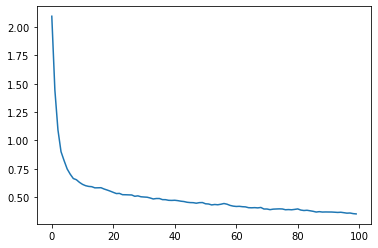

In [12]:
# plot losses
plt.plot(clf.history['loss'])

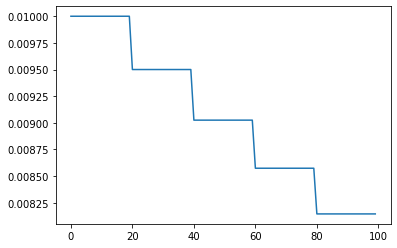

In [13]:
# plot learning rates
plt.plot(clf.history['lr'])

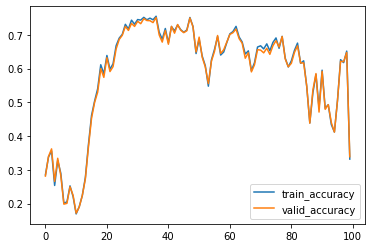

In [14]:
# plot accuracy
plt.plot(clf.history['train_accuracy'], label='train_accuracy')
plt.plot(clf.history['valid_accuracy'], label='valid_accuracy')
plt.legend()

In [15]:
# 自动识别是否为多分类任务
clf.classes_

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [16]:
clf.predict(X_test)

array([2, 1, 3, ..., 2, 3, 2], dtype=int64)

In [17]:
clf.predict_proba(X_test)

array([[3.2851419e-01, 6.3971508e-01, 3.4376196e-06, ..., 3.1632483e-02,
        4.7177720e-05, 6.7513392e-05],
       [5.0139368e-01, 4.9722287e-01, 1.2774854e-07, ..., 1.3291604e-03,
        6.9084217e-06, 4.6248995e-05],
       [9.7422278e-05, 5.5773593e-03, 4.6047306e-01, ..., 6.1099445e-03,
        3.4200725e-01, 5.0055114e-06],
       ...,
       [1.3887842e-02, 9.8449880e-01, 5.0027108e-08, ..., 1.5973737e-03,
        1.5072018e-06, 1.4260288e-05],
       [1.6257742e-05, 9.3261676e-04, 5.0850606e-01, ..., 5.7212112e-04,
        4.8469630e-01, 1.2141420e-05],
       [1.9762535e-02, 9.0009403e-01, 2.4726315e-04, ..., 7.9208441e-02,
        2.9839991e-04, 2.5305417e-04]], dtype=float32)

In [18]:
# 特征的相对重要性
clf.feature_importances_

array([1.77756090e-01, 1.49718874e-02, 2.74487608e-03, 6.57246049e-02,
       3.74520510e-03, 1.65291659e-01, 1.23937738e-02, 5.13016477e-05,
       9.22778099e-06, 7.69427550e-03, 5.11231072e-03, 1.10322422e-03,
       7.59101621e-02, 7.19210019e-02, 1.27444003e-03, 2.06041405e-02,
       1.00135976e-02, 7.40810695e-03, 3.85032496e-03, 5.39651539e-03,
       6.86642942e-04, 1.35419712e-02, 8.28469583e-03, 1.52915365e-04,
       3.03378687e-04, 2.85239839e-02, 1.09978891e-03, 1.30025395e-03,
       5.54126080e-03, 1.67657126e-03, 1.04931461e-02, 7.30576941e-03,
       4.01179609e-03, 4.75000514e-02, 4.56939059e-05, 2.42647633e-03,
       1.85054204e-03, 2.18688087e-02, 1.12382967e-04, 7.60794065e-04,
       1.16017531e-02, 7.92737647e-03, 1.20804605e-02, 4.33183038e-02,
       8.59908075e-04, 2.33562615e-05, 9.53959099e-03, 1.71044794e-02,
       4.54674574e-04, 4.12585287e-03, 9.55036082e-04, 9.93623991e-05,
       5.95414142e-02, 2.19047821e-02])